In [1]:
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
n_sbs = 100000

# Building dimensions
building_width = np.random.rand(n_sbs)*50 + 5
building_length = np.random.rand(n_sbs)*50 + 5

# Shared between shoeboxer and autozoner
shared_floor_2_floor_height = np.random.rand(n_sbs)*3 + 3 
shared_perim_depth = np.random.rand(n_sbs)*2 + 4 
# shared_perim_depth = 5

# Shoeboxer only dimensions
shoebox_width = np.random.rand(n_sbs)*7+2

# Building-level computed properties
gfa = building_width * building_length
facade_area = (2*building_width + 2*building_length)*shared_floor_2_floor_height
gfa_2_facade_area = gfa / facade_area

# shoeboxer dimensions
shoebox_facade_area = shoebox_width * shared_floor_2_floor_height
total_shoebox_area = gfa_2_facade_area * shoebox_facade_area
total_shoebox_depth = total_shoebox_area / shoebox_width
shoeboxer_core_depth = total_shoebox_depth - shared_perim_depth
shoeboxer_core_frac = shoeboxer_core_depth / total_shoebox_depth
shoeboxer_perim_frac = 1 - shoeboxer_core_frac
shoeboxer_has_core = shoeboxer_core_depth > 0

# Autozoner dimensions
autozoner_core_width = building_width - 2*shared_perim_depth
autozoner_core_length = building_length - 2*shared_perim_depth
autozoner_has_core = (autozoner_core_width > 0) & (autozoner_core_length > 0)
autozoner_core_area = autozoner_core_width * autozoner_core_length
autozoner_core_frac = autozoner_core_area / gfa
autozoner_perim_frac = 1 - autozoner_core_frac


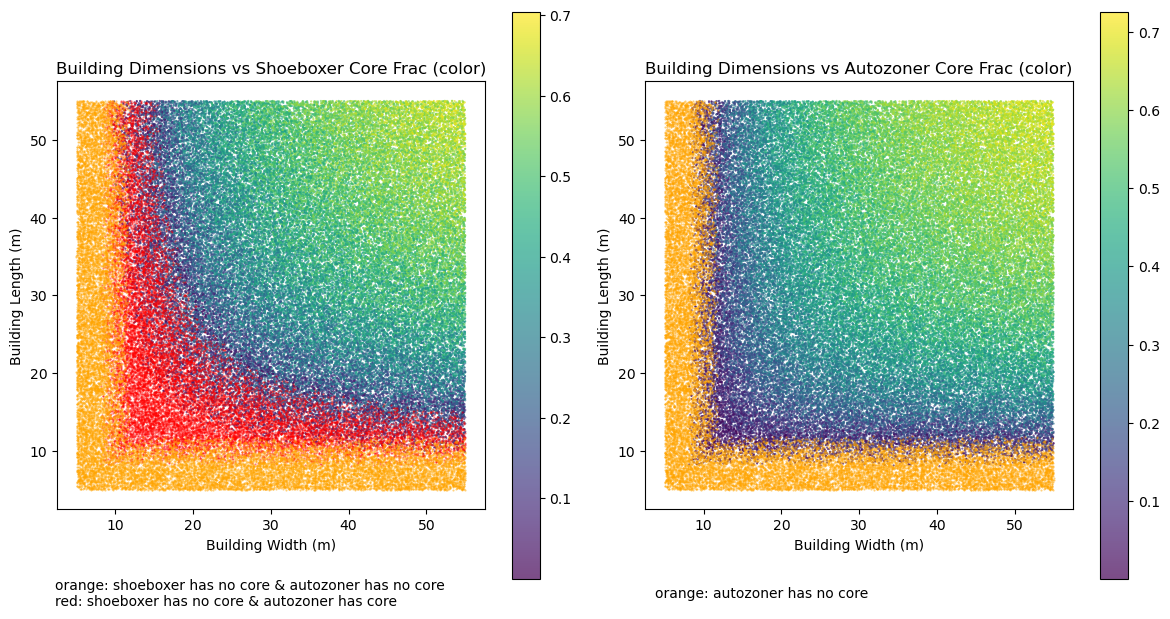

In [3]:
fig, axs= plt.subplots(1,2,figsize=(12,6))
axs[0].set_title("Building Dimensions vs Shoeboxer Core Frac (color)")
axs[0].set_xlabel("Building Width (m)")
axs[0].set_ylabel("Building Length (m)")
scat = axs[0].scatter(building_width[shoeboxer_has_core & autozoner_has_core],building_length[shoeboxer_has_core & autozoner_has_core],c=shoeboxer_core_frac[shoeboxer_has_core & autozoner_has_core], s=0.3, alpha=0.7)
axs[0].scatter(building_width[~shoeboxer_has_core & autozoner_has_core],building_length[~shoeboxer_has_core & autozoner_has_core],c='red', s=0.3,alpha=0.5)
axs[0].scatter(building_width[~shoeboxer_has_core & ~autozoner_has_core],building_length[~shoeboxer_has_core & ~autozoner_has_core],c='orange', s=0.3,alpha=0.5)
axs[0].set_aspect('equal', 'box')
cbar = plt.colorbar(scat)
axs[1].set_title("Building Dimensions vs Autozoner Core Frac (color)")
axs[1].set_xlabel("Building Width (m)")
axs[1].set_ylabel("Building Length (m)")
scat = axs[1].scatter(building_width[autozoner_has_core],building_length[autozoner_has_core],c=autozoner_core_frac[autozoner_has_core], s=0.3, alpha=0.7)
axs[1].scatter(building_width[~autozoner_has_core],building_length[~autozoner_has_core],c='orange', s=0.3,alpha=0.5)
axs[1].set_aspect('equal', 'box')
cbar = plt.colorbar(scat)
fig.text(0.05, 0.00, "orange: shoeboxer has no core & autozoner has no core\nred: shoeboxer has no core & autozoner has core", ha='left', va='center')
fig.text(0.55, 0.00, "orange: autozoner has no core", ha='left', va='center')
fig.tight_layout()

Text(-10, -14, 'Green dots are buildings where autozoner has core but total shoebox depth < 5m')

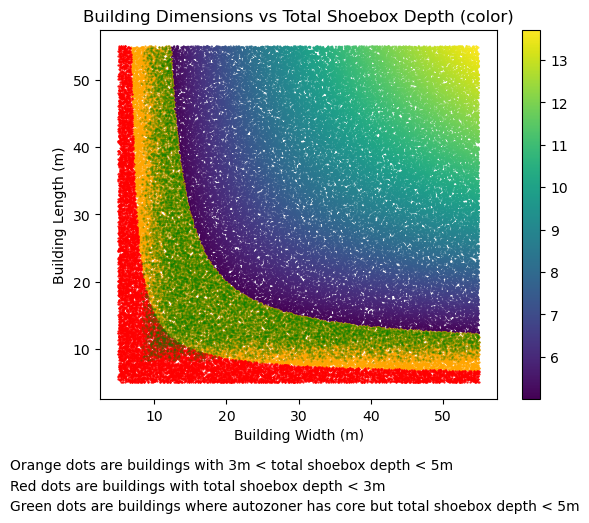

In [6]:
plt.title("Building Dimensions vs Total Shoebox Depth (color)")
plt.xlabel("Building Width (m)")
plt.ylabel("Building Length (m)")
shoebox_depth_mask = (total_shoebox_depth > 5)
shoebox_orange_mask = (~shoebox_depth_mask) & (total_shoebox_depth > 3)
shoebox_red_mask = total_shoebox_depth <=3
plt.scatter(building_width[shoebox_depth_mask],building_length[shoebox_depth_mask],c=total_shoebox_depth[shoebox_depth_mask], s=0.3)
plt.colorbar()
plt.scatter(building_width[shoebox_orange_mask],building_length[shoebox_orange_mask],c="orange", s=0.3)
plt.scatter(building_width[shoebox_red_mask],building_length[shoebox_red_mask],c="red", s=0.3)
plt.scatter(building_width[shoebox_red_mask & autozoner_has_core],building_length[shoebox_red_mask & autozoner_has_core],c="green", s=0.3,alpha=0.3)
plt.scatter(building_width[shoebox_orange_mask & autozoner_has_core],building_length[shoebox_orange_mask & autozoner_has_core],c="green", s=0.3, alpha=0.3)
# add a note about the red dots
plt.text(-10, -8, "Orange dots are buildings with 3m < total shoebox depth < 5m")
plt.text(-10, -11, "Red dots are buildings with total shoebox depth < 3m")
plt.text(-10, -14, "Green dots are buildings where autozoner has core but total shoebox depth < 5m")

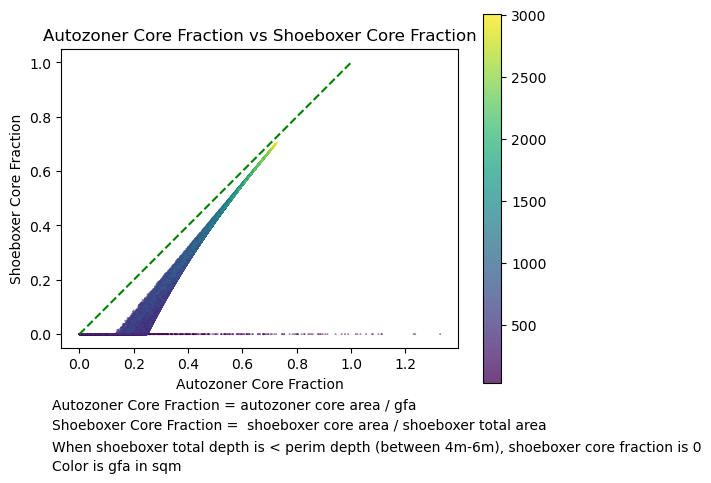

In [7]:

plt.figure()
plt.title("Autozoner Core Fraction vs Shoeboxer Core Fraction")
plt.plot([0,1],[0,1], "--", color="green", label="Perfect Fit")
plt.scatter(np.where(autozoner_core_frac > 0, autozoner_core_frac,0), np.where(shoeboxer_core_frac > 0, shoeboxer_core_frac, 0), s =0.1, c=gfa, alpha=0.75)
plt.colorbar()
plt.ylabel("Shoeboxer Core Fraction")
plt.xlabel("Autozoner Core Fraction")
plt.text(-0.1,-0.275, "Autozoner Core Fraction = autozoner core area / gfa")
plt.text(-0.1,-0.35, "Shoeboxer Core Fraction =  shoeboxer core area / shoeboxer total area")
plt.text(-0.1,-0.43, "When shoeboxer total depth is < perim depth (between 4m-6m), shoeboxer core fraction is 0")
plt.text(-0.1,-0.5, "Color is gfa in sqm")
plt.gca().set_aspect('equal')

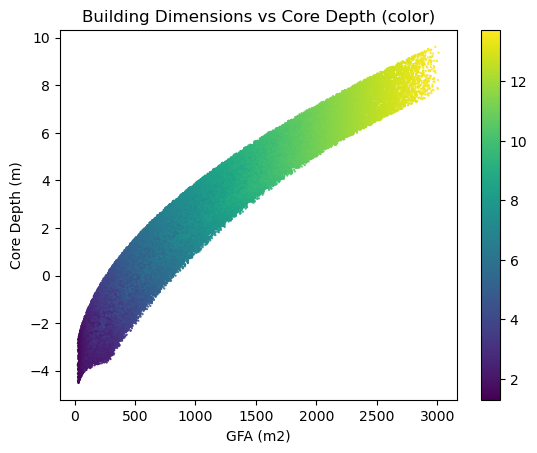

In [8]:

plt.title("Building Dimensions vs Core Depth (color)")
plt.xlabel("GFA (m2)")
plt.ylabel("Core Depth (m)")
plt.scatter(gfa,shoeboxer_core_depth,c=total_shoebox_depth, s=0.3)
plt.colorbar()
# plt.hist(core_depth, bins=100)
